# Text Preprocessing

Suppose we have a textual data available, we need to apply many of pre processing steps to the data to transform those words to numarical feature that can work machine learning algorithm

The Pre Processing steps for the problem depend mainly on the domain and the problem itself. We dont need to apply all the steps for every problem.

Hence, we are going to see preproceeisng in Pyhton. We'll use NLTK(Natural language toolkit) Library here

In [ ]:
# Import necessary Libraries

import nltk
import string
import re 

# Text lowercase

We do lowercase the text to reduce the size of teh vocabulary of our text data

In [ ]:
def lowercase_text(text):
    return text.lower()

input_str = 'Weather is too CLoudy. Possibility of Rain is hogh, Today!!'
lowercase_text(input_str)

# Remove Number

We should either remove the number or convert those number into textual representation. We use regular expression (re) to remove the number

In [ ]:
# for removing Number

def remove_num(text):
    result = re.sub(r'\d+','',text)
    return result
input_s = "You have 6 mangoes and put it in the basket, I will give 4 to you"
remove_num(input_s)

As we mentioned above, you have also coverted into words. This could be done by using the inflect library

In [ ]:
! pip install inflect

In [ ]:
# import inflect library

import inflect

q = inflect.engine()

# convert number into text
def convert_num(text):
    #split string into list of texts
    temp_string = text.split()
    #initialise empty list
    new_str = []
    
    for word in temp_string:
        # if text is a digit, convert the digit
        #to number and append into the new_str list
        if word.isdigit():
            temp = q.number_to_words(word)
            new_str.append(temp)
            
        # append the text as it is
        else:
            new_str.append(word)
    #join the texts of new_str to form a string
    temp_str = ' '.join(new_str)
    return temp_str

input_str = 'you bought 6 candies from shop, and 4 candies are in the home.'
convert_num(input_str)

## Remove Punctuation

We remove punctuation because of that we dont have different form of the same word. If we don't remove punctuation, then been, been, and been! will be treated separately

In [ ]:
 # lets remove puncuation

import string

def rem_punt(text):
    trasnlator = str.maketrans(' ',' ', string.punctuation)
    return text.translate(trasnlator)

input_str = "Hey, are you excited ??, After a week, we will be in Shimla !!"
rem_punt(input_str)

In [ ]:
string.punctuation

# Remove default stopwords:


Stopworks are words that do not contibute of the meanting of the sentence. Hence they can be safely removed without causing any change in the meaning of a sentance. The NLTK (Natural language Toolkit) library has the set of stopwords and we can use there to remove stopwords from our text and return a list of word tokens

In [ ]:
# importing important librabies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

In [20]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    
    # Filter punctuation and stopwords
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word.lower() not in stop_words]
    
    return filtered_text

ex_text  = 'Data is the new oil, A.I is the last invention'
print(rem_stopwords(ex_text))


['Data', 'new', 'oil', 'A.I', 'last', 'invention']


# Stemming

From stemming we will process of getting the root form of a word. Root or stem is the part of which inflextional affixes (like ed,ize, etc) are added. We would create the stem words by removing the prefix of suffix od a word. So, stemming a word may not result in actual worked.

For Example : Manager --> Mango
                   Boys ---> Boy
                   going --> go
        
If our sentances are not in tokens, then we need to convert it into tokens. After we converted strings if text into tokens, then we can convert those word tokens into their root form. These are the porter stemmer, then snowball stemmer and the Lancaster stemmer. We usually use Porter stemmer among them

In [24]:
# importing important libraries

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stem1 = PorterStemmer()

# stem words in the llist of tokenised words

def s_words(text):
    word_tokens = word_tokenize(text)
    stems = [stem1.stem(word) for word in word_tokens]
    return stems


text = 'Data is the new revolution in the world , in a day one individual world generate terabytes of data'
s_words(text)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'world',
 'gener',
 'terabyt',
 'of',
 'data']

# Lemmatixation

As stemming, lemmatization do the smae but the only difference is that lemmatization ensures that root word belongs to the language. Because of the ise tof lemmatization we will get the valid words. In NLTK, we use wordLemmatizer to get the lemmas of words. We also need to provide a ccontext for the lemmatization. So, we added pos(Part-of-speech) as a patameter.

In [32]:
from nltk.stem import wordnet
from nltk.tokenize import word_tokenize
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')
#Lemmatize stringr
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    
    #provide context i.g part-of-speech(pos)
    lemmas = [lemma.lemmatize(word, pos = 'v') for word in word_tokens]
    return lemmas

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
text = 'Data is the new revolutions in the world, in a dat one individual would generate terabytes of data'
lemmatize_word(text)

['Data',
 'be',
 'the',
 'new',
 'revolutions',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'dat',
 'one',
 'individual',
 'would',
 'generate',
 'terabytes',
 'of',
 'data']

# Parts of Speech (POS) Tagging

Th POS expain you how a word is used in a sentence. In the sentence, a word have differenc contexts and semantic meanings. The basic natural language Processing[NLP] models like bag-of-words(bow) fails to identify these relation between the words. For that we ue pos tagging  to mark a words to its pos tag based on its context in the data. Pos is also used to extract relationship between the words

In [35]:
# importing tokenize library


from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

# covert text to word_tokens with their tags

def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg('Are you afraid of something?')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In [37]:
#downloading the tagset


nltk.download('tagsets')

#extract information about the tag
nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [38]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [39]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


# Chunking

Chunking is the process of extracting phrases fornt he unstructured tezt and give them more structure to it. We also called them shallow parsing. We can do it on top of pos tagging. it groups words into chunks mainly for noun phrases. Chunking we do by using regular expression

In [40]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

#here we define chunking function with text and regular
#expressions representing grammer as parameter

def chunking(text, grammar):
    works_tokens = word_tokenize(text)
    
    #label words with pos
    word_pos = pos_tag(works_tokens)
    
    #create chunk [arset using grammar]
    chunkParser = nltk.RegexpParser(grammar)
    
    #test it on the list of word tokens with tagged pos
    
    tree = chunkParser.parse(word_pos)
    
    for subtree in tree.subtrees():
        print(subtree)
        
    #tree.draw()
    
    
sentence = 'the little red parrot is flying in the sky'
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(sentence,grammar)

(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


In the above example, we defined the grammmar by using the regular expressoion rule. This rule tells you that NP(Noun Phrase) chunk should be formed whenever the chunker find the option determiner(DJ) followed by any no. of adjectives and then a NN(Noun)

image after running above code

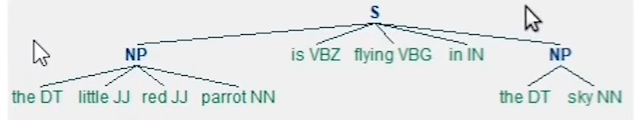

Libraries like spacy and TextBlob are best chunking.

# Name Entity Recognition

It is used to extract information from unstructured text. It is used to classy the entities which is present in the text into categories like a person, organization, event, place etc. This will give you a details knowledge about text and the relationship between the different entites

In [43]:
# importing tokenization and chunk

from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk

nltk.download('maxent_ne_chunker')
nltk.download('words')

def ner(text):
    #tokenize the text
    
    word_tokens = word_tokenize(text)
    
    #pos tagging of words
    word_pos = pos_tag (word_tokens)
    
    #tree of word entities
    
    print(ne_chunk(word_pos))
    
text = 'brain lara scored the highest 400 runs in a test match which played in between WI annd England'
ner(text)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...


(S
  brain/NN
  lara/NN
  scored/VBD
  the/DT
  highest/JJS
  400/CD
  runs/NNS
  in/IN
  a/DT
  test/NN
  match/NN
  which/WDT
  played/VBD
  in/IN
  between/IN
  WI/NNP
  annd/NN
  (GPE England/NNP))


[nltk_data]   Unzipping corpora\words.zip.


# Understanding Regex

As you're a software developer, you have probably encountered regular expressions many times and got consufed many times with there daunting set of characters grop together like:- 

And you may woundered that is all about??

Regular Expressions (RegExp or RegExp) are too usefuk in stepping up your algorithm game and this will make you a better problem solver. The structure if Regx can be intimidating at first, but it is very rewardibg once you got all the patterns and implements them in your work properly.

# What is RegEx and why is it important?

A Regex or we called it as regular expression, it is a type of object will help you out to extract information form any string data by searching through text and find ot out what you need. Whether it's punctual, numbers, ;etters or even white spaces, RegEx will allow you to check and match any if the character comination in strings.

For Example, suppose you need to matfh the format of a email addesses or security number, You can utilise RegEx to check the pattern in side the text siring and use it to replace antother substring.

For instance, a RegEx,could tekk the program to search for the specific text from the string and then to print out the output acccordingly. Expressions can include  Text matching Repetition or words, branchingm pattern-composition.

Python support RegEx though libraries. In RegRX supports for the verious things like **Identifiers, Modifiers and WHite SPace**

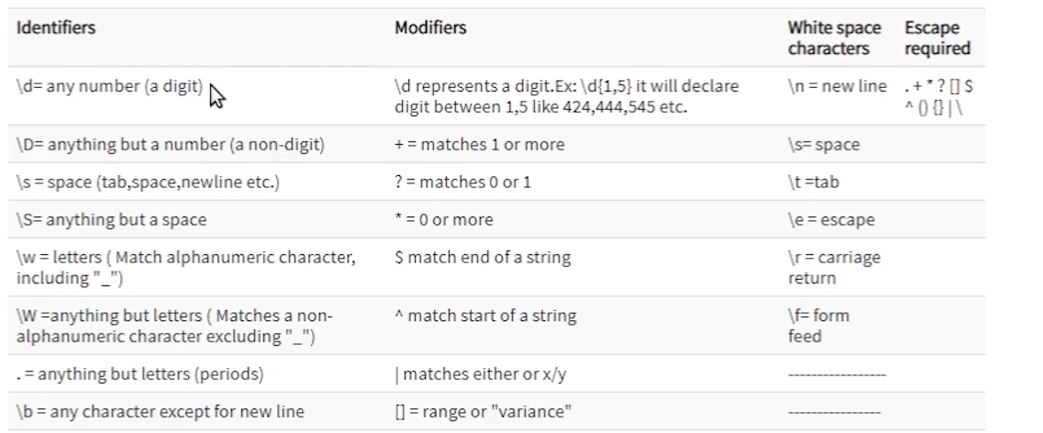

# RegEx Syntax

import re

- re library in python is used for string searching and manipulation
- We also used it it frequentlyvfor web scraping

**Example for w+ and ^ Expression**

- ^ :- Here in this expression matches the start of a string
- w+ : This Expression matches for the alphanumaric character from inside the string

Here,we will give one example of how you can use "w+" and "^" expressions in code, re.findall will cover in next parts. so just focus on the "w+" and "^"  expression.

Lets have an example "iNeuron13, Data is new fuel". If we execute the code we will get "iNeuron13" as a result

In [44]:
import re

sent = "Dataset, data is a new fuel"
r2 = re.findall(r"^\w+", sent)
print(r2)

['Dataset']


**Example of is expression in re.split function**

- "s." This expression we use for create a spacce in the string

To Understandd better this expression we will use the split function in a simple example. In this example, we have to split each word using the "re.split" function and ar the same time we have used \s that allows to parse eacg word in the string seperately

In [45]:
import re

print((re.split(r'\s','we splited this sentence')))

['we', 'splited', 'this', 'sentence']


As we can see above we got the output ['we', 'splited', 'this', 'sentence'] but what if we remove "\ " from '\s'. Is will give result like remove 's' from the entire sentence. Let's see in below example

In [46]:
import re

print((re.split(r's','we splited this sentence')))

['we ', 'plited thi', ' ', 'entence']


Similarly, there are series of regular expression in python that you can use in various ways like \d, \D, $ . \b

# Use RegEx Methon

The 're' pachages provide several methods to acctually oerfirm queries on an input string
    re.match()\
    re.search()\
    re.findall()\
**Note :** Based on the RegEx, python offers two differnt primitive operations. This mtch method checks for the mach only at the string while search checks for a match anywhere in the string.

# Using re.match()

The match findction is used to match the RegEx pattern to string with optional flag. Here, in this "w+" and "W" will match the word from "i" and threreafter, anythinf wich is not started with ''i is not indentified.For checking match for each element in the list or string, we run the For Loop 

In [50]:
import re

lists = ['icecream imgae', 'i immitated', 'inner peace']

for i in lists:
    q = re.match("(i\w+)\W(i\W+)",i)
    
    if q:
        print(q.groups())

# Find pattern in the text(re.search())

A RefEx is commonly ised tp seafch for a pattern in the text. This method takes  A RegEx pattern and a string and searches that pattern with the string.

For  using re.search() function, you need to import re first. The Search() function take the "pattern" and "text" to scan from our given string andd returns the match object when the pattern found or else not match.

In [54]:
import re

pattern = ["playing","dateset"]
text = "Raju is playing outside"

for p in pattern:
    print("You're looking for '%s' in '%s'" %(p,text), end = '')
    
    if re.search(p, text):
        print('Found match!')
        
    else:
        print('No match Found!')

You're looking for 'playing' in 'Raju is playing outside'Found match!
You're looking for 'dateset' in 'Raju is playing outside'No match Found!


in the Above exapme, we look for two literal strings " Playing", "iNeuron" and in the text string we had taken "Raju Is playing outside". For "Playing" we got the match and in the output we got "Found Match". while for the the word "iNeuron" we didn't got any match. So we gor no match found for the word.

In [55]:
import re

kgf = "Abc@gmail.com, XYZ@gmail.com, lmn@gmail.com, efg@gmail.com"

emails = re.findall(r'[\w\.]+@[\w\.]+',kgf)

for e in emails:
    print(e)

Abc@gmail.com
XYZ@gmail.com
lmn@gmail.com
efg@gmail.com


# Text Normalization

In the text pre-processing highly overlooked step is text normalization. The tezt normalization means the process of transforming the text into the canonical(or standard) form. Like, "Ok" and "K" can ve trasnformed to "Okey".Its canonical form. and another example is mapping if near identical words such as preprocessing,  "preprocessing" andd "pre-processing" to just "Preprocessing"

Text normalixation is too usefukk for noisy test such as soccial media comments, comment to blog posts, text messagesm where abbreviations, misspellings, and the use Out-of-vocabulary(oov) are prevant. 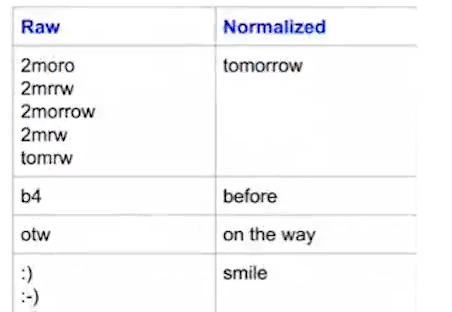

# Effects of normalization

Text normalization has been effiective for analyzing highly unstructured clinical text where physicians take nores in non-standard ways. We have also found it useful for topic extraction where near synonyms and spelling differences are common ("Topic modeling", "Topic Modelling", "topic modelling")

Unlike stemming and lemmatization, there us not a standard way to normalize texts. It typically depends in the task. For e.g. the way you would normalize clinical text would arguably different from how you normalize text messages.

Some of the common approaches to text normalization include dictionary mappings, statisticall machine translation(SMT) and spelling-correction based approaches

# TOKENIZERS

**NLTK**

In [56]:
from nltk.tokenize.regexp import WhitespaceTokenizer

m= "'There is no need to panic, we need to work togather, Take small yet important measure to ensure self-protection'"

In [57]:
from nltk.tokenize import word_tokenize

text = """ Fiunded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a mulptiple spaces bu building a seld sustainting city on Mars. In 2008, SpaceX's Falcin 1 became the first privatly develped liquid fuel launch vahicle to orbit the Earth"""

word_tokenize(text)

['Fiunded',
 'in',
 '2002',
 ',',
 'SpaceX',
 "'s",
 'mission',
 'is',
 'to',
 'enable',
 'humans',
 'to',
 'become',
 'a',
 'spacefaring',
 'civilization',
 'and',
 'a',
 'mulptiple',
 'spaces',
 'bu',
 'building',
 'a',
 'seld',
 'sustainting',
 'city',
 'on',
 'Mars',
 '.',
 'In',
 '2008',
 ',',
 'SpaceX',
 "'s",
 'Falcin',
 '1',
 'became',
 'the',
 'first',
 'privatly',
 'develped',
 'liquid',
 'fuel',
 'launch',
 'vahicle',
 'to',
 'orbit',
 'the',
 'Earth']

Note in the above we had used a slightky different syntac for importing the module, You'll recognise by now the variable assignment

In [58]:
tokens = WhitespaceTokenizer().tokenize(m)

In [60]:
print(tokens)

["'There", 'is', 'no', 'need', 'to', 'panic,', 'we', 'need', 'to', 'work', 'togather,', 'Take', 'small', 'yet', 'important', 'measure', 'to', 'ensure', "self-protection'"]


In [61]:
my_vocab = set(tokens)
print(len(tokens))

19


In [62]:
my_vocab

{"'There",
 'Take',
 'ensure',
 'important',
 'is',
 'measure',
 'need',
 'no',
 'panic,',
 "self-protection'",
 'small',
 'to',
 'togather,',
 'we',
 'work',
 'yet'}

Now we are going to perfom the same operation but with the different tokenizer

In [63]:
my_st = "'There is no need to panic. We need to word togather. take small yet important measure to ensure self-protection'"

We'll import different tokenizer:

In [65]:
from nltk.tokenize.regexp import WordPunctTokenizer

#ABove tokenizer also split the words into tokens

In [66]:
m_t = WordPunctTokenizer().tokenize(my_st)

print(len(m_t))

25


In [67]:
m_t

["'",
 'There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'word',
 'togather',
 '.',
 'take',
 'small',
 'yet',
 'important',
 'measure',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 "'"]

In [68]:
my_vocab = set(m_t)
print(len(my_vocab))

20


In [69]:
my_vocab

{"'",
 '-',
 '.',
 'There',
 'We',
 'ensure',
 'important',
 'is',
 'measure',
 'need',
 'no',
 'panic',
 'protection',
 'self',
 'small',
 'take',
 'to',
 'togather',
 'word',
 'yet'}

What is the differnece between the above approaches? In the first once, vocabulary ends ip containing "words" and "words."  as two distict words, whereas in secind example " Words" is a token type andd "." is split into a sepatate token and this results into a new token type in addition to "Words"

In [70]:
from nltk.tokenize import sent_tokenize

text = """Fiunded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a mulptiple spaces bu building a seld sustainting city on Mars. In 2008, SpaceX's Falcin 1 became the first privatly develped liquid fuel launch vahicle to orbit the Earth"""

sent_tokenize(text)

["Fiunded in 2002, SpaceX's mission is to enable humans to become a spacefaring civilization and a mulptiple spaces bu building a seld sustainting city on Mars.",
 "In 2008, SpaceX's Falcin 1 became the first privatly develped liquid fuel launch vahicle to orbit the Earth"]

# Frequency Distribution

What is Frequency distribution? this is basically counting words in you texts. Tp give a brief example of how it works.

In [72]:
# from nlkt.book.import *

import nltk 

nltk.download('gutenberg')

print("\n\n\n")

test1 = "'There is no need to panic. We need to word togather. take small yet important measure to ensure self-protection'"

freqDist = nltk.FreqDist(word_tokenize(test1))
print(freqDist)

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\skv96\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.






<FreqDist with 18 samples and 22 outcomes>


The class **FreqDist** works like a dictionaly where keys are the words in the text and the values are count associated with the words. For example if you want to see how many words "person" are in the text, you can type as

In [73]:
print(freqDist['person'])

0


In [74]:
print(freqDist['need'])

2


One of the most important function in **FreqDist** is the .key() function. Let us see what will it given in a below code

In [76]:
words = freqDist.keys()
print(type(words))

<class 'dict_keys'>


After running above code, it'll give as class 'dic_keys', in the other words you get a list of all the words in your text

And you want to see how many words are there in the text.

In [77]:
print(len(words))

18


In the class nltk.text. Text Function do the difference> The diffence is that with freqDist you can create your own text without the necessity of cobertion your text to nltk.text. Text class

And the other usual function is plot. Plot will do loke it displays the most used words in your text. So, if you want to see 15 most used words in the text. for example like:



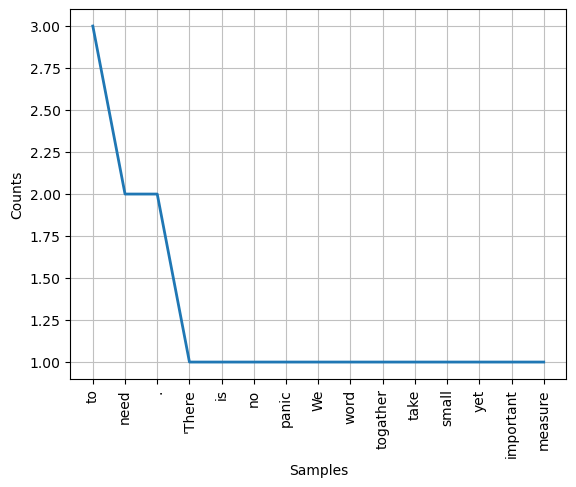

<Axes: xlabel='Samples', ylabel='Counts'>

In [78]:
freqDist.plot(15)